$$\Huge \text{ Module 3}$$ 

$$\huge \text{ Regularization, Learning Curves}$$ 

$$\huge \text{ Imputing, One-Hot Encoding}$$ 

$$\huge \text{Multivariate Regression}$$ 



In [1]:
%run packagesM3.py



# Fit and plot different degree polynomials to the data below. 
<br>

<font size=4> 

 * Notice the toy data is really closely fit by a 4th degree polynomial.
 
        y = -1+ 0.05*X**4+4* (np.random.randn(m, 1)-1/2)
 * Compute the score on the training data and do a 5 fold Cross Validation.
 * Is it overfitting or underfitting?  What make s you think so? Graph? CV scores vs training score? 

In [2]:
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
reg=linear_model.LinearRegression()

np.random.seed(42)
m = 200
X = 10* (np.random.rand(m, 1)-1/2)
y = -1+ 0.05*X**4+4* (np.random.randn(m, 1)-1/2)
X_new = np.linspace(-5, 5, 100).reshape(100, 1)

## Linear Model

R^2 on all data we trained on 0.0013773241633078248


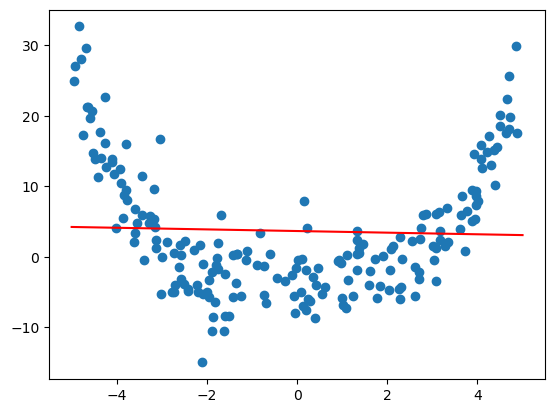

In [3]:
poly_f=PolynomialFeatures(degree=1,include_bias=False)
X_poly=poly_f.fit_transform(X)
reg.fit(X_poly,y)
plt.scatter(X,y)
l0=np.linspace(-5, 5, 100)
l1=l0.reshape(-1,1)
L1=poly_f.fit_transform(l1) 
plt.plot(l1, reg.predict(L1), "r")
print("R^2 on all data we trained on",reg.score(X,y)) 

In [4]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(reg, X, y, cv=5
                    , scoring='r2')
print("R^2 for each  fold of the cross validation ",cvs)
print("Average of the R^2  scores",np.mean(cvs))

R^2 for each  fold of the cross validation  [-0.01091189 -0.03934074 -0.05180973 -0.04557033 -0.0120451 ]
Average of the R^2  scores -0.031935557938996786


<font size=5 color =blue>__Learning Curves are plots of model performance on a tst set and a train set based on the size of the training set.__</font>

<font size =4 >Below we define a function that produces learning curves

In [5]:
#
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

### Learning curves this is under-fitting the curves converge on training but  RSME remains high.

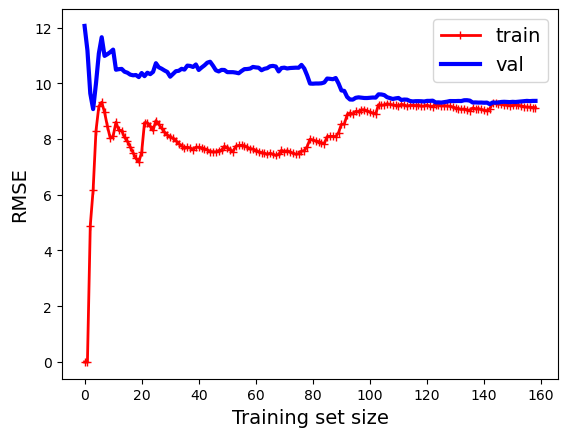

In [6]:
plot_learning_curves(reg, X, y)


## 15th Degree Polynomial

R^2 on all data we trained on 0.8353144525041813


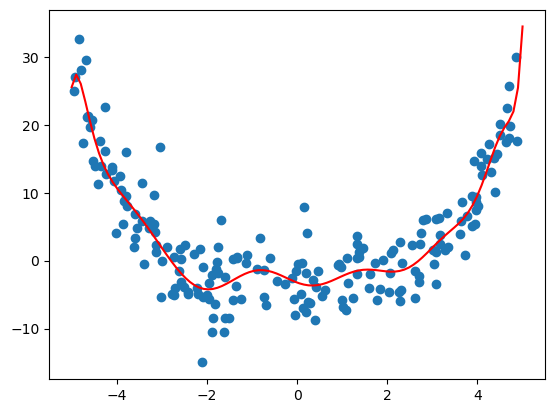

In [7]:
poly_f=PolynomialFeatures(degree=15,include_bias=False)
X_poly=poly_f.fit_transform(X)

#from sklearn.preprocessing import scale
#X_poly=scale(X_poly)
plt.scatter(X,y)
reg.fit(X_poly,y)
l0=np.linspace(-5, 5, 100)
l1=l0.reshape(-1,1)
L1=poly_f.fit_transform(l1) 
plt.plot(l1, reg.predict(L1), "r")
print("R^2 on all data we trained on",reg.score(X_poly,y)) 

In [8]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(reg, X_poly, y, cv=5, scoring='r2')
print("R^2 for each  fold of the cross validation ",cvs)
print("Average of the R^2  scores",np.mean(cvs))
reg.coef_

R^2 for each  fold of the cross validation  [0.79217868 0.73664962 0.72368001 0.84408772 0.86197841]
Average of the R^2  scores 0.791714886641379


array([[-2.45320852e+00,  2.62423560e+00,  2.99063701e+00,
        -1.67867681e+00, -1.05267541e+00,  3.98849726e-01,
         1.80623755e-01, -4.31354815e-02, -1.72548903e-02,
         2.39766326e-03,  9.27850423e-04, -6.65027052e-05,
        -2.60915673e-05,  7.30053753e-07,  2.97110623e-07]])

### Learning curves this is over-fitting.  The error on the train set is good but if we zoom in ( take # off second line) we see it is far from the error on the test set. 

(np.float64(100.0), np.float64(160.0), np.float64(0.0), np.float64(12.0))

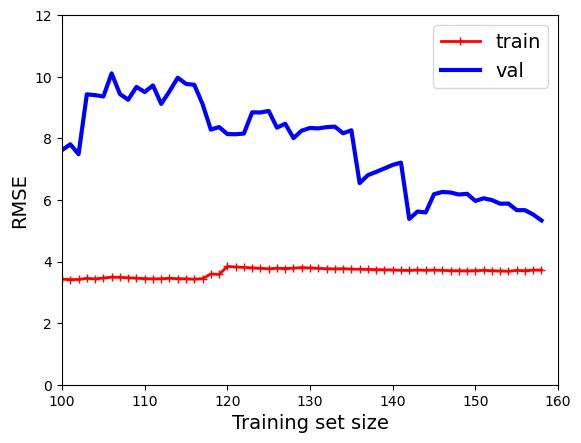

In [9]:

plot_learning_curves(reg, X_poly, y)
plt.axis([100, 160, 0, 12])   


## Fourth  degree polynomial 

R^2 on all data we trained on 0.8253308426053884


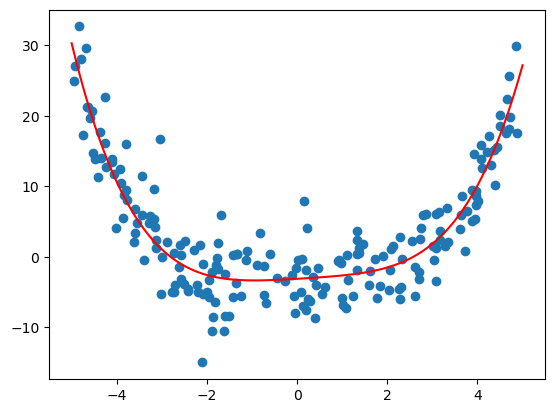

In [10]:
poly_f=PolynomialFeatures(degree=4,include_bias=False)
X_poly=poly_f.fit_transform(X)

#from sklearn.preprocessing import scale
#X_poly=scale(X_poly)
plt.scatter(X,y)
reg.fit(X_poly,y)
l0=np.linspace(-5, 5, 100)
l1=l0.reshape(-1,1)
L1=poly_f.fit_transform(l1) 
plt.plot(l1, reg.predict(L1), "r")
print("R^2 on all data we trained on",reg.score(X_poly,y)) 

In [11]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(reg, X_poly, y, cv=5, scoring='r2')
print("R^2 for each  fold of the cross validation ",cvs)
print("Average of the R^2  scores",np.mean(cvs))
reg.coef_

R^2 for each  fold of the cross validation  [0.81197366 0.79737298 0.72303888 0.88272743 0.86042533]
Average of the R^2  scores 0.8151076563781936


array([[ 0.37866602,  0.07637966, -0.02763315,  0.04790602]])

### Learning curves this is our best fit.  The error on the train set converges to the error on the test set and both are low. 

(np.float64(100.0), np.float64(160.0), np.float64(0.0), np.float64(12.0))

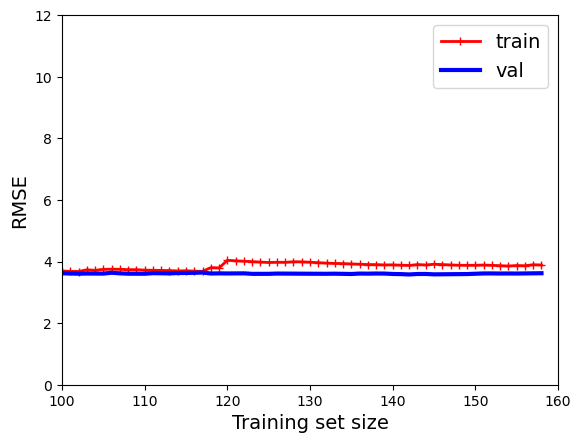

In [12]:

plot_learning_curves(reg, X_poly, y)
plt.axis([100, 160, 0, 12])   

# Ridge and Grid Search.

<font size=4>

I made some slight notational changes from your book. [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

Ridge Regression (also called [Tikhonov regularization](https://en.wikipedia.org/wiki/Tikhonov_regularization) )is a regularized version of Linear Regression: a
regularization term equal to is added to the cost function. This forces the learning algorithm to
not only fit the data but also keep the model weights as small as possible. Note that the regularization term
should only be added to the cost function during training. Once the model is trained, you want to evaluate
the model’s performance using the un-regularized performance measure.

Ridge Regression cost function 

$$ \begin{align*}J_{ridge}(\theta) & =\sum_{i=1}^m|h_\theta(x_i)-y_i|^2+\alpha\theta^T\theta\\ &= mMSE(\theta)+\alpha\sum_{i=1}^n\theta_i^2 \\
& = \|X\theta-y\|_2^2+\alpha \|\theta\|_2^2\\
&=(X\theta-y)^T(X\theta -y) +\alpha\theta^T\theta \end{align*} $$ 

**Note** that the bias term $θ_0$ is not regularized (the sum starts at i = 1, not 0). If we define w as the vector of
feature weights ($θ_1$ to $θ_n$), then the regularization term is simply equal to $½(∥ w ∥_2)^2$, where $∥ · ∥_2$
represents the ℓ2 norm of the weight vector.

**WARNING**
It is important to scale the data (e.g., using a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) i.e., [z-Score](https://en.wikipedia.org/wiki/Standard_score))before performing Ridge Regression. The model  is sensitive to the scale
of the input features. This is true of most regularized models.

The gradient for  Ridge Regression in terms of matrices is:
$$\begin{align*} \nabla J_{ridge}(\theta) &=\nabla\left((X\theta-y)^T(X\theta -y) +\alpha\theta^T\theta\right)\\
&=2X^TX\theta-2X^Ty+2\alpha \theta \\ 
&= (2X^TX+ 2\alpha I)\theta-2X^Ty\end{align*}$$ 
    
 <font color =red>__THE MAIN TUNNING PARAMETER FOR RIDGE IS THIS $\alpha$.  Larger $\alpha$ produce greater regularization.__    

<font size=4> 
    
* Do a GridSearchCV with  $\alpha \in$ [1,3,6,9,12] with 4 folds.
* Display results in a data Frame
* What is the best model?
* Is it better than the model above with no regularization?
* Plot the model with the data.

In [13]:
from sklearn.linear_model import Ridge

poly_f=PolynomialFeatures(degree=9
                          ,include_bias=False)
X_poly=poly_f.fit_transform(X)
from sklearn.preprocessing import scale
X_poly=scale(X_poly)

from sklearn.model_selection import GridSearchCV

params={'alpha': [1,3,6,9,12]}
rdg_reg = Ridge()
clf = GridSearchCV(rdg_reg,params,cv=4,verbose = 0)

clf.fit(X_poly,y)
print("best Alpha",clf.best_params_,"bestscore",clf.best_score_)

DF=pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score")
#DF
DF[["param_alpha","mean_test_score","rank_test_score"]]



best Alpha {'alpha': 9} bestscore 0.8108739157114735


,param_alpha,mean_test_score,rank_test_score
3,9,0.810874,1
2,6,0.810852,2
4,12,0.810797,3
1,3,0.810574,4
0,1,0.809522,5


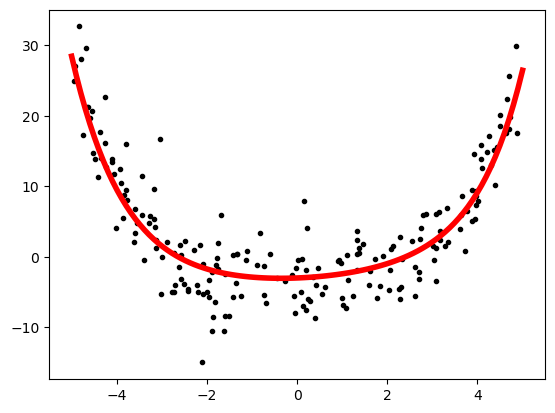

In [14]:
X_new = np.linspace(-5, 5, 100).reshape(100, 1)
X_new_poly= poly_f.fit_transform(X_new)
X_new_poly=scale(X_new_poly)
plt.plot(X, y, "k.", linewidth=3)
plt.plot(X_new, clf.best_estimator_.predict(X_new_poly), "r", linewidth=4)

In [15]:
clf.best_estimator_

,alpha,9
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [16]:
clf.best_estimator_.score(X_poly,y)

0.8219880065512916

In [17]:
clf.best_estimator_.coef_

array([ 0.73053392,  2.57368435, -0.65305168,  2.88018983, -0.43156972,
        1.93418163, -0.0298485 ,  0.91770132,  0.22530988])

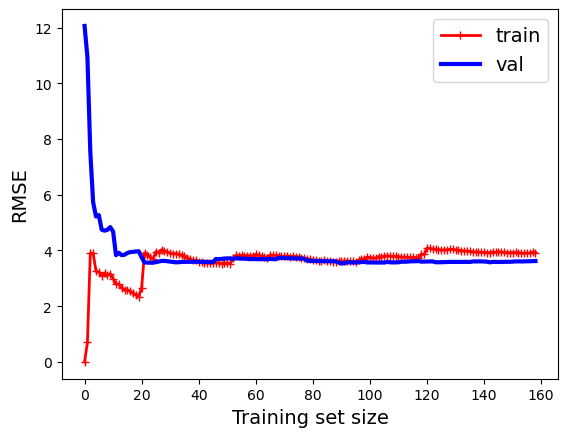

In [18]:
plot_learning_curves(clf.best_estimator_, X_poly, y)
#plt.axis([100, 160, 0, 12])   

# Lasso 

<font size=4>
    
[Lasso Regression](https://en.wikipedia.org/wiki/Lasso_(statistics)#Motivation)

Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso Regression) is
another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm

$$ \begin{align}J_{lasso}(\theta)&=MSE(\theta)+\alpha\sum_{i=1}^m|\theta_i|\\
&= \frac{1}{m} \|X\theta-y\|_2^2+\alpha\|\theta\|_1\end{align}$$

An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the
least important features (i.e., set them to zero). For example, the dashed line in the right plot on Figure 4-
18 (with α = 10-7) looks quadratic, almost linear: all the weights for the high-degree polynomial features
are equal to zero. In other words, Lasso Regression automatically performs feature selection and outputs a
sparse model (i.e., with few nonzero feature weights).

Lasso has a few draw backs in that it has no closed form solution to find the minimizer $\hat \theta$ and because the cost function $J(\theta)$ has an absolute value in it, it is not differentiable at zero. However we can still use gradient descent and methods from linear programing to find the minimum. For gradient decent we simply set the derivative to 0 if $\theta=0$    

$$\nabla_\theta J(\theta) =\nabla MSE(\theta)+ \alpha\begin{bmatrix}sign(\theta_1)\\sign(\theta_2)\\ \vdots \\ sign(\theta_n)\end{bmatrix} \text{ where } sign(\theta_i)=\begin{cases} \frac{\theta_i}{|\theta_i|} \text{ if }\theta_i \ne 0\\ 0 \text{ if }\theta_i=0 \end{cases}  $$

In [19]:
from sklearn.linear_model import Lasso

poly_f=PolynomialFeatures(degree=9,include_bias=False)
X_poly=poly_f.fit_transform(X)
from sklearn.preprocessing import scale
X_poly=scale(X_poly)

from sklearn.model_selection import GridSearchCV

#params={'alpha': [1,3,6,9,12]}
params={'alpha': np.linspace(.01,2,10)}
lasso_reg = Lasso()
clf = GridSearchCV(lasso_reg,params,cv=4,verbose = 0)

clf.fit(X_poly,y)
print("best Alpha",clf.best_params_,"bestscore",clf.best_score_)

DF=pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score")
#DF
DF[["param_alpha","mean_test_score","rank_test_score"]]

best Alpha {'alpha': np.float64(0.23111111111111113)} bestscore 0.8170364893637011


,param_alpha,mean_test_score,rank_test_score
1,0.231111,0.817036,1
2,0.452222,0.816554,2
3,0.673333,0.814105,3
4,0.894444,0.810324,4
0,0.010000,0.809354,5
5,1.115556,0.805337,6
6,1.336667,0.799144,7
7,1.557778,0.791745,8
8,1.778889,0.783139,9
9,2.000000,0.773278,10


In [20]:
params

{'alpha': array([0.01      , 0.23111111, 0.45222222, 0.67333333, 0.89444444,
        1.11555556, 1.33666667, 1.55777778, 1.77888889, 2.        ])}

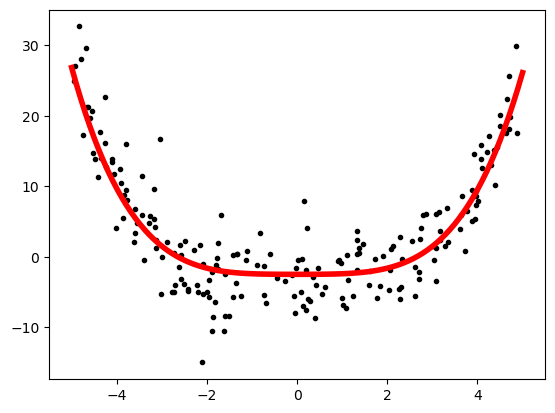

In [21]:
X_new = np.linspace(-5, 5, 100).reshape(100, 1)
X_new_poly= poly_f.fit_transform(X_new)
X_new_poly=scale(X_new_poly)
plt.plot(X, y, "k.", linewidth=3)
plt.plot(X_new, clf.best_estimator_.predict(X_new_poly), "r", linewidth=4)

In [22]:
clf.best_estimator_.score(X_poly,y)

0.8221469494602527

In [23]:
clf.best_estimator_

,alpha,np.float64(0....1111111111113)
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [24]:
clf.best_estimator_.coef_

array([-0.        ,  0.30266543, -0.        ,  7.76055419, -0.0078394 ,
        0.        , -0.09260919,  0.        , -0.        ])

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


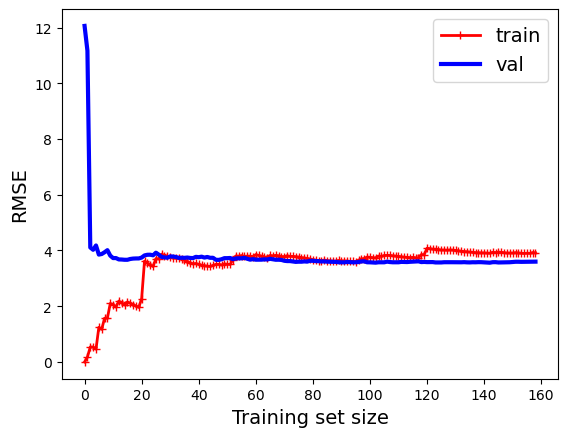

In [25]:
plot_learning_curves(clf.best_estimator_, X_poly, y)

# Data Cleaning and one Hot encoding.

<font size=4>  Let's consider another Data Repository.  https://archive.ics.uci.edu/  We will try and predict highway-mpg from select numeric and categorical data. https://archive.ics.uci.edu/dataset/10/automobile

In [26]:
#!pip install ucimlrepo

In [27]:
from ucimlrepo import fetch_ucirepo 
automobile = fetch_ucirepo(id=10) 

ModuleNotFoundError: No module named 'ucimlrepo'

In [ ]:

  
# data (as pandas dataframes) 
X = automobile.data.features

#df.iloc[:, : 50]
X=X.iloc[:,[1,4,9,10,11,12,17,18,20]] # I subseted some data out
print(X.shape)
X.head()


<font size=4> Let's see if we have any missing values or NANs.  There are just a couple so we will drop the rows with them.  We could also have used  [Simple Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html).

In [ ]:
X.isna().sum()

In [ ]:
X=X.dropna()

<font size=4> Divide the data frame into numerical and categorical data. Find which numerical feature has the strongest (negatively or positively) correlation with highway-mpg.

In [ ]:
numerical_data = X.select_dtypes("number")
string_data = X.select_dtypes(object)
numerical_data.corr()['highway-mpg']

## One hot encoding

<font size=4 > There are several ways we can handle Categorical Data.  One is [One Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)  See wiki page for more on [OneHot](https://en.wikipedia.org/wiki/One-hot)
    
    
Let's One hot encode the string data using
    
    enc = OneHotEncoder(drop='if_binary',sparse_output=False).set_output(transform="pandas")
 then join it with the numerical data using [df.join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary',sparse_output=False).set_output(transform="pandas")
hot_str=enc.fit_transform(string_data)
X_cat=numerical_data.join(hot_str)
X_cat

## Lasso Reg with multiple features

<font size=4 > Look at the correlations again. Of the Categorical data features which is most positively correlated with highway-mpg?

In [ ]:
X_cat.corr()['highway-mpg'].sort_values(ascending=False)

<FONT SIZE=4 > Make highway-mpg the target and use the rest of the variables as features. Then perform a sandard scaling on the features.

In [ ]:
Xfeat,y=X_cat.drop(columns="highway-mpg"),X_cat.iloc[:,0]

from sklearn.preprocessing import StandardScaler
SS =StandardScaler().fit(Xfeat)
XfeatS=SS.transform(Xfeat)

<FONT SIZE=4 > Perform a Lasso regression with a GridSearch CV using 3 folds with the following parameter grid
    
     params={'alpha': [.1,.5,1,2,3]} 

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

params={'alpha': [.1,.5,1,2,3,5]} 

lasso_reg = Lasso()
lasso_grid = GridSearchCV(lasso_reg,params,cv=3,verbose = 0)

<FONT SIZE=4 >  Display your results in a  data frame keeping only 
    
    "param_alpha","mean_test_score","rank_test_score"

In [ ]:
lasso_grid.fit(XfeatS,y)
print("best Alpha",lasso_grid.best_params_,"bestscore",lasso_grid.best_score_)

DF=pd.DataFrame(lasso_grid.cv_results_)

DF[["param_alpha","mean_test_score","rank_test_score"]]




<font   size=4> Look at the coefficients for the best_estimator_ Lasso Model from the grid search and determine which feature has the most effect on this model.  __Give the actual name of the feature.__
I used this to get labels on the coefficients.
    
    feat_imp=pd.DataFrame(lasso_grid.best_estimator_.coef_.reshape(1,16))
    feat_imp.columns=Xfeat.columns
    feat_imp
    

In [ ]:
feat_imp=pd.DataFrame(lasso_grid.best_estimator_.coef_.reshape(1,16))
feat_imp.columns=Xfeat.columns
feat_imp

<font size=4> Let's plot the actual vs predicted.

In [ ]:
pred=lasso_grid.best_estimator_.predict(XfeatS)
plt.scatter(y,pred)
plt.plot(y,y)
plt.ylabel("Predicted")
plt.xlabel("Actual")

<font size=4 color =blue> Above is a visualization  from when I ran the model.  What mileages does it seem to predict worse? Explain. 

<font size=4 color =brown> __Answer:__